In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_excel(r"/content/Crude Oil Prices Daily.xlsx")
Data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [3]:
Data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [4]:
Data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [5]:
Data.dropna(axis=0,inplace=True)
Data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [6]:
Data_oil=Data.reset_index()['Closing Value']

In [7]:
Data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
Data_oil=scaler.fit_transform(np.array(Data_oil).reshape(-1,1))

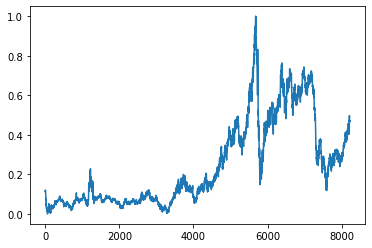

In [9]:
plt.plot(Data_oil)

In [10]:
training_size=int(len(Data_oil)*0.65)
test_size=len(Data_oil)-training_size
train_data,test_Data=Data_oil[0:training_size,:],Data_oil[training_size:len(Data_oil),:1]

In [11]:
training_size,test_size

(5340, 2876)

In [12]:
train_data.shape

(5340, 1)

In [13]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX),np.array(dataY)  

In [14]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_Data, time_step)

In [15]:
print(X_train.shape),print(y_train.shape)


(5329, 10)
(5329,)


(None, None)

In [16]:
print(X_test.shape),print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [17]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

Model building

In [ ]:
import tensorflow
import keras



In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
model=Sequential()

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 38ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2967e-04 - val_loss: 7.9120e-04
Epoch 3/50
84/84 [==============================] - 2s 22ms/step - loss: 1.3406e-04 - val_loss: 0.0018
Epoch 4/50
84/84 [==============================] - 2s 21ms/step - loss: 1.3115e-04 - val_loss: 8.7848e-04
Epoch 5/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2451e-04 - val_loss: 9.3762e-04
Epoch 6/50
84/84 [==============================] - 2s 30ms/step - loss: 1.3032e-04 - val_loss: 8.7038e-04
Epoch 7/50
84/84 [==============================] - 2s 23ms/step - loss: 1.1868e-04 - val_loss: 9.7627e-04
Epoch 8/50
84/84 [==============================] - 2s 22ms/step - loss: 1.3736e-04 - val_loss: 7.6763e-04
Epoch 9/50
84/84 [==============================] - 2s 22ms/step - loss: 1.2760e-04 - val_loss: 9.0257e-04
Epoch 10/50
84/84 [==============================

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

90/90 [==============================] - 1s 5ms/step


In [28]:
train_predict= scaler.inverse_transform(train_predict)
test_predict=  scaler.inverse_transform(test_predict)

In [29]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.780929782350373

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))

80.00817828847731

In [31]:
from tensorflow.keras.models import load_model


In [32]:
model.save("crude_oil.h5")

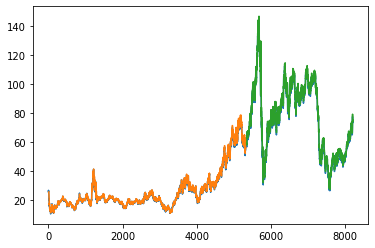

Green indicates predicated data
Blue indicates complete data
Orange indicates train data


In [33]:
look_back=10
trainPredictPlot = np.empty_like(Data_oil)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict
testPredictPlot = np.empty_like(Data_oil)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data_oil)-1, :]= test_predict
plt.plot(scaler.inverse_transform(Data_oil))
plt.plot(trainPredictPlot,label="traindata")
plt.plot(testPredictPlot,label="testdata")
plt.show()
print("Green indicates predicated data")
print("Blue indicates complete data")
print("Orange indicates train data")

In [34]:
len(test_Data)

2876

In [35]:
X_input=test_Data[2866:].reshape(1,-1)
X_input.shape

(1, 10)

In [36]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [38]:
lst_output=[]
n_steps=10
i=0
while(i<10):
  if(len(temp_input)>10):
    X_input=np.array(temp_input[1:])
    print("{} Day input {}".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,n_steps,1))   
    yhat=model.predict(X_input, verbose=0)
    print("{} Day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,n_steps,1))
    yhat=model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

[0.48271394]
11
1 Day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.48271394]
1 Day output [[0.49502867]]
2 Day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.48271394 0.49502867]
2 Day output [[0.5077646]]
3 Day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.48271394 0.49502867 0.50776458]
3 Day output [[0.5195375]]
4 Day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.48271394 0.49502867 0.50776458 0.51953751]
4 Day output [[0.5301123]]
5 Day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.48271394
 0.49502867 0.50776458 0.51953751 0.53011233]
5 Day output [[0.5392478]]
6 Day input [0.47341922 0.46497853 0.47038353 0.47149415 0.48271394 0.49502867
 0.50776458 0.51953751 0.53011233 0.53924781]
6 Day output [[0.5471674]]
7 Day input [0.46497853 0.47038353 0.47149415 0.48271394 0.49502867 0.5

In [39]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [40]:
len(Data_oil)

8216

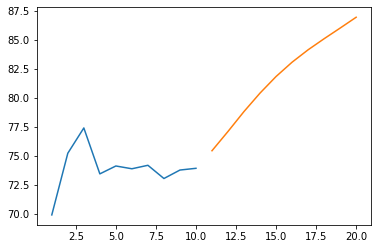

In [41]:
plt.plot(day_new,scaler.inverse_transform(Data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

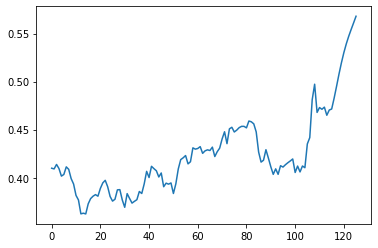

In [42]:
df3=Data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

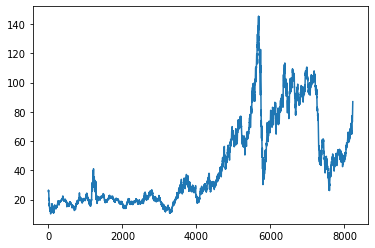

In [43]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)